<a href="https://colab.research.google.com/github/ClementineAccount/Albuquerque/blob/main/ML_Project_TestingCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My attempt to follow along with: https://www.kaggle.com/code/manthansolanki/image-classification-with-mnist-dataset/notebook


1. Import packages

Let's first import all the packages that we will use during this tutorial.

    Tensorflow is an end-to-end open source platform for machine learning.
    Keras is an open-source library that provides a Python interface for artificial neural networks.
    numpy is the main package for scientific computing with Python.
    matplotlib is a library to plot graphs in Python.
    open-cv is open computer vision library.



In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)                          # This allows us to reproduce the results from our script
from keras.models import Sequential             
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.utils import np_utils            # help us to transform our data later

# New Section

2. Load dataset
MNIST Dataset

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)
Label: 5
Label: 0
Label: 5
Label: 0


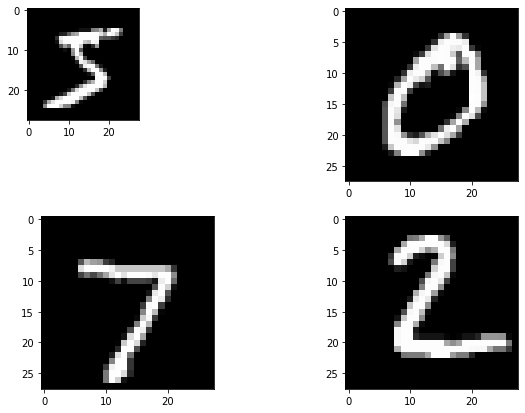

In [ ]:
print('Total no of Images: ',X_train.shape[0]) 
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

#look input data

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(3, 3, 1)

plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))  # cmap - convert image into grascale
print('Label:', y_train[0])

#Curious what the other input data looks like

fig.add_subplot(2, 2, 2)

plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))  # cmap - convert image into grascale
print('Label:', y_train[1])


fig.add_subplot(2, 2, 3)

plt.imshow(X_test[0], cmap = plt.get_cmap('gray'))  # cmap - convert image into grascale
print('Label:', y_train[0])

#Curious what the other input data looks like

fig.add_subplot(2, 2, 4)

plt.imshow(X_test[1], cmap = plt.get_cmap('gray'))  # cmap - convert image into grascale
print('Label:', y_train[1])

#Oh I get it. The test data and training data are separate




3. Prepare input data

For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform easily using the reshape() function on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit.


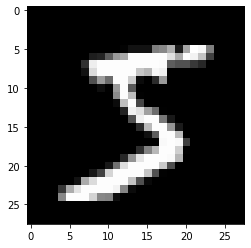

In [ ]:

fig.add_subplot(3, 3, 5)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))  # cmap - convert image into grascale

#So this is just only one shape for the X_Train
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#print(X_train.shape, X_test.shape)


Normalize Input data¶

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [ ]:

X_test = X_test/255

# print(X_train[0])

X_train = X_train/255
print(X_train[0])

In [ ]:
# One-hot encoding

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)

(60000, 10)


In [ ]:
num_classes = y_test.shape[1]
num_pixels = 784

Where the real stuff happens...

4. Define Model

Input size of our model - 784 (28 x 28). There are 2 hidden layers with 256 and 64 neurons in each.

In hidden layers, we will use relu activation function. And in final output layer, we'll use softmax activation function.
Relu Function:

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
Softmax Function:

The Softmax function that turns numbers aka logits into probabilities that sum to one. Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes.

relu-softmax.png

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [ ]:
# build the model
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8023 - accuracy: 0.5204
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9388 - accuracy: 0.7870
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6253 - accuracy: 0.8459
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5033 - accuracy: 0.8713
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4384 - accuracy: 0.8852


In [ ]:

scores = model.evaluate(X_test, y_test, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8987
Error: 10.13%


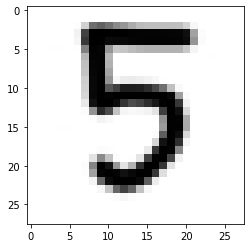

In [ ]:
#Try the image given to see

img_width, img_height = 28, 28

ii3 = cv2.imread("sample_data/5png.png")

gray_image3 = cv2.cvtColor(ii3, cv2.COLOR_BGR2GRAY)
gray_image3.resize(img_width, img_height)

# print(gray_image)
plt.imshow(gray_image3,cmap='Greys')
plt.show()
# gray_image.shape
x_seven = np.expand_dims(gray_image3, axis=0)
x_seven = x_seven.reshape((1, -1))


In [ ]:

predictions = np.argmax(model.predict(x_seven),axis=1)
#prob = model.predict_proba(x)


print('Predicted value is ',predictions[0])
#print('Probability across all numbers :', prob)

1/1 [==============================] - 0s 25ms/step
Predicted value is  5
